## Packages

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sys

print(f"Python version -> {sys.version}")  # 3.12.3
print(f"keras version -> {keras.__version__}")  # 3.12.0
print(f"numpy version -> {np.__version__}")  # 2.3.2

Python version -> 3.12.3 (main, Aug 14 2025, 17:47:21) [GCC 13.3.0]
keras version -> 3.12.0
numpy version -> 2.3.2


NameError: name 'pd' is not defined

## Importing Data

In [16]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test  : ", x_test.shape)
print("y_test  : ", y_test.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


## Data Normalization

In [17]:
xmax = x_train.max()
x_train = x_train / xmax
x_test = x_test / xmax

### Some examples

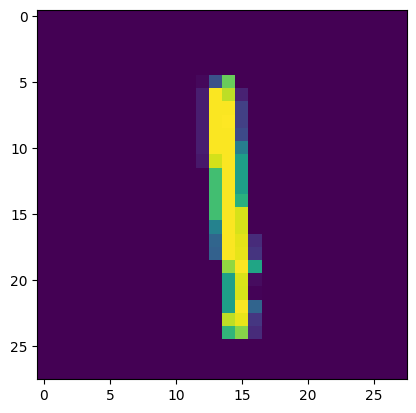

In [18]:
plt.imshow(x_train[8])

In [19]:
y_train[2]

np.uint8(4)

## Building model


In [20]:
hidden1 = 200
hidden2 = 200

model = keras.Sequential(
    [
        keras.layers.Input((28, 28)),
        keras.layers.Flatten(),
        keras.layers.Dense(hidden1, activation="relu"),
        keras.layers.Dense(hidden2, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

## Train the model

In [21]:
batch_size = 512
epochs = 64

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
)

Epoch 1/64
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8777 - loss: 0.4532 - val_accuracy: 0.9373 - val_loss: 0.2117
Epoch 2/64
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9522 - loss: 0.1659 - val_accuracy: 0.9581 - val_loss: 0.1423
Epoch 3/64
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9662 - loss: 0.1175 - val_accuracy: 0.9675 - val_loss: 0.1141
Epoch 4/64
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9732 - loss: 0.0896 - val_accuracy: 0.9717 - val_loss: 0.0922
Epoch 5/64
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9784 - loss: 0.0722 - val_accuracy: 0.9736 - val_loss: 0.0869
Epoch 6/64
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9830 - loss: 0.0578 - val_accuracy: 0.9745 - val_loss: 0.0800
Epoch 7/64
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9865 - loss: 0.0456 - val_accuracy: 0.9751 - val_loss: 0.0773
Epoch 8/64
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9888 - loss: 0.0388 - val_accu

## Evaluation of the model


In [29]:
score = model.evaluate(x_test, y_test, verbose=0)

print("Test loss     :", score[0])
print("Test accuracy :", score[1])

Test loss     : 0.1004967987537384
Test accuracy : 0.982699990272522


## Plot history

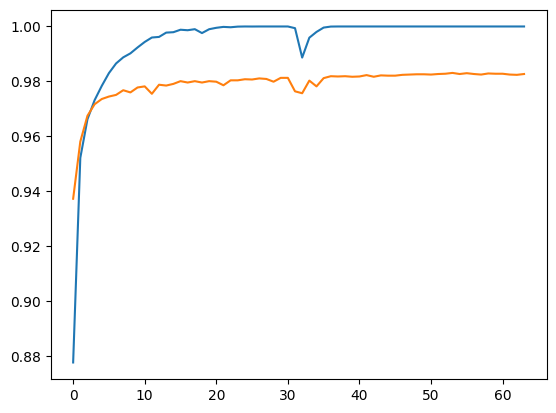

In [30]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

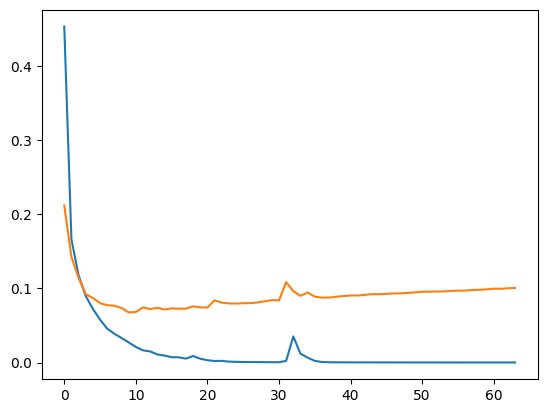

In [24]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

## Performance Analysis

In [31]:
y_softmax = model.predict(x_test)
y_pred = np.argmax(y_softmax, axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [32]:
errors = [i for i in range(len(x_test)) if y_pred[i] != y_test[i]]
len(errors)

173

In [33]:
print(confusion_matrix(y_test, y_pred))  # order matters! (actual, predicted)

[[ 975    0    1    0    1    0    1    1    1    0]
 [   0 1124    3    2    0    0    2    1    3    0]
 [   2    0 1017    1    1    0    1    5    4    1]
 [   0    0    5  989    1    3    0    3    2    7]
 [   1    0    1    0  967    0    4    2    1    6]
 [   2    0    0    8    2  867    5    1    5    2]
 [   4    2    1    1    3    4  943    0    0    0]
 [   1    2    8    2    1    0    0 1007    2    5]
 [   1    0    2    4    2    5    0    3  952    5]
 [   1    2    0    6    6    4    1    2    1  986]]


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

